In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [59]:
def gen_image():
     # Set image size
     image_size = 128

     # Create blank image
     image = np.ones((image_size, image_size, 3), dtype=np.uint8) * (245, 66, 179)
     image = image.astype(np.float32)
     image *= 0.5
     image = image.astype(np.uint8)

     # Draw circle with random color and radius in middle of image
     center = (image_size//2, image_size//2)
     color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
     radius = np.random.randint(image_size//4, image_size//2)
     cv2.circle(image, center, radius, color, thickness=-1)

     # Draw concentric circles with random colors and radii in middle of image
     for i in range(4):
          color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
          radius = np.random.randint(image_size//8, image_size//2)
          thickness = np.random.randint(1, 5)
          cv2.circle(image, center, radius, color, thickness=thickness)

     # Draw petals with random colors and thickness around circle
     for i in range(8):
          color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
          thickness = np.random.randint(1, 5)
          petal_pts = cv2.ellipse2Poly(center, (image_size//3, image_size//8), i*45, 0, 360, delta=5)
          cv2.fillConvexPoly(image, petal_pts, color)

     # Draw quarter circles with random colors and thickness at corners
     for i in range(4):
          color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
          thickness = np.random.randint(2, 5)
          start_angle, end_angle = 0, 360
          if i == 0:
               pt = (0, 0)
          elif i == 1:
               pt = (0, image_size-1)
          elif i == 2:
               pt = (image_size-1, image_size-1)
          else:
               pt = (image_size-1, 0)
          cv2.ellipse(image, pt, (image_size//4, image_size//4), angle=0, startAngle=start_angle, endAngle=end_angle, color=color, thickness=thickness)

          # Draw small filled circle with random color and radius in middle of image
          color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
          radius = np.random.randint(15, 25)
          cv2.circle(image, center, radius, color, thickness=-1)

     return image

(<matplotlib.image.AxesImage at 0x1f2391e8640>, Text(0.5, 1.0, '4'))

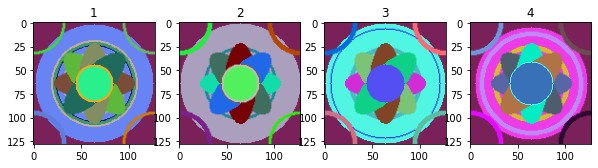

In [60]:
# Generate four images
image1 = gen_image()
image2 = gen_image()
image3 = gen_image()
image4 = gen_image()

fig, ax = plt.subplots(1,4,figsize=(10,10))
ax[0].imshow(image1),ax[0].set_title('1')
ax[1].imshow(image2),ax[1].set_title('2')
ax[2].imshow(image3),ax[2].set_title('3')
ax[3].imshow(image4),ax[3].set_title('4')

In [70]:
# Create random matrix
image_size = 16
matrix = np.random.randint(1, 5, size=(image_size, image_size))

# Assign each cell to one of four images
images = [image1, image2, image3, image4]
result = np.zeros((image_size * images[0].shape[0], image_size * images[0].shape[1], 3), dtype=np.uint8)

for row in range(matrix.shape[0]):
    for col in range(matrix.shape[1]):
        image_idx = matrix[row, col] - 1
        image = images[image_idx]
        result[row*image.shape[0]:(row+1)*image.shape[0], col*image.shape[1]:(col+1)*image.shape[1], :] = image

In [76]:
# Show painting
fig, ax = plt.subplots(figsize=(100, 100))
ax.imshow(result, interpolation='nearest')
plt.tight_layout()